f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x)

In [148]:
from sympy.abc import x
from sympy import Symbol, solveset, solve, diff, plot, is_increasing, Interval, oo, is_decreasing, S 
from sympy import sin, cos, simplify, periodicity, pi, singularities, nonlinsolve

In [149]:
x = Symbol('x', real=True)

In [150]:
y = simplify((sin(x)/2 + cos(x)/2)**2 * sin(x))
y

sin(x)*sin(x + pi/4)**2/2

Определить корни

In [151]:
solveset(y, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

Найти интервалы, на которых функция возрастает

In [152]:
derivate = diff(y)
derivate

sin(x)*sin(x + pi/4)*cos(x + pi/4) + sin(x + pi/4)**2*cos(x)/2

In [153]:
periodicity(y, x)

2*pi

In [154]:
y.subs(x, 10+2*pi)

sin(10)*sin(pi/4 + 10)**2/2

In [155]:
solve([x >= 0, x <= 2*pi, y], x)

(0 <= x) & (x <= 2*pi) & (Eq(x, 0) | Eq(x, pi) | Eq(x, 3*pi/4) | Eq(x, 7*pi/4))

In [156]:
period_derivate = periodicity(derivate, x)
period_derivate

2*pi

In [157]:
x0 = list(solveset(derivate, x, Interval(0, period_derivate)).evalf(n=5))
x0

[1.0591, 2.3562, 2.8679, 4.2007, 5.4978, 6.0095]

In [158]:
x1 = [0, *x0, period_derivate.evalf(n=5)]
x1

[0, 1.0591, 2.3562, 2.8679, 4.2007, 5.4978, 6.0095, 6.2832]

In [159]:
_list = []
for i in range(0, len(x1)-1):
    _list.append(((x1[i], x1[i+1]), "Increase" if derivate.subs(x, (x1[i]+x1[i+1])/2).evalf(5)>0 else "Decrease"))
_list

[((0, 1.0591), 'Increase'),
 ((1.0591, 2.3562), 'Decrease'),
 ((2.3562, 2.8679), 'Increase'),
 ((2.8679, 4.2007), 'Decrease'),
 ((4.2007, 5.4978), 'Increase'),
 ((5.4978, 6.0095), 'Decrease'),
 ((6.0095, 6.2832), 'Increase')]

Построить график

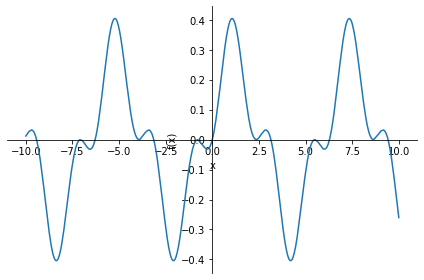

In [171]:
graph = plot(y)

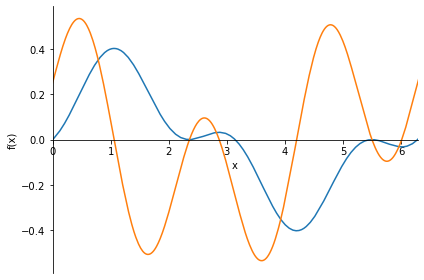

In [172]:
graph = plot(y, derivate, xlim=(0, 2*pi))

Вычислить вершину

In [168]:
y0 = list(map(lambda a: (a, y.subs(x, a).evalf(5, chop=True)), x0))
y0

[(1.0591, 0.40411),
 (2.3562, 0),
 (2.8679, 0.032404),
 (4.2007, -0.40411),
 (5.4978, 0),
 (6.0095, -0.032404)]

Определить промежутки, на котором f > 0

In [169]:
solveset(y>0,x,S.Reals)

Union(Interval.open(0, 3*pi/4), Interval.open(3*pi/4, pi))

Определить промежутки, на котором f < 0

In [170]:
solveset(y<0,x,S.Reals)

Union(Interval.open(pi, 7*pi/4), Interval.open(7*pi/4, 2*pi))